# Exercise 1
## 1.a
Quite frankly this is a shameless copy of exercise 1a. I did not really understand what was wanted

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def euler_method(ode, x0, step_t, final_t):
    res = np.zeros([int(np.ceil(final_t/step_t)), len(x0)])
    res[0,:] = x0

    for i, t in enumerate(np.arange(0, final_t-step_t, step_t)):
        res[i+1,:] = res[i,:] + step_t * ode(t, res[i,:])

    return res

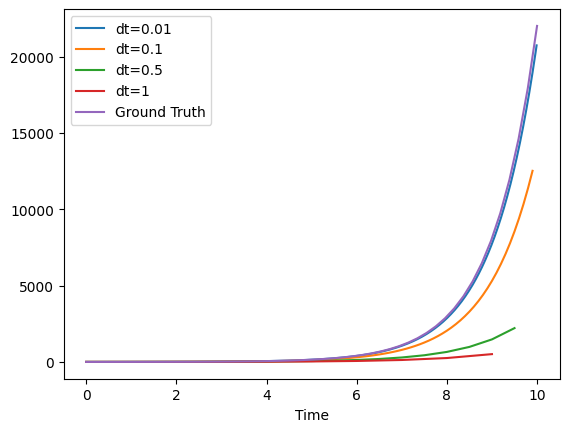

In [4]:
equation = lambda t,x : x
x0 = np.array([1])
dt_list = [0.01, 0.1, 0.5, 1]
T = 10
for dt in dt_list:
    t = np.arange(0, T, dt)
    estimate = euler_method(equation, x0, dt, T)
    plt.plot(t, estimate, label=f'dt={dt}')

plt.plot(np.linspace(0,T), np.exp(np.linspace(0,T)), label='Ground Truth')
plt.legend()
plt.xlabel('Time')
plt.show()

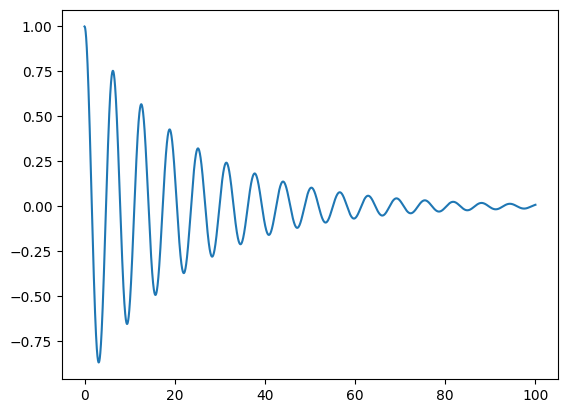

In [5]:
equation = lambda t,x : np.array([x[1], -x[1]*c/m - x[0]*k/m])
m, c, k = 1, 0.1, 1
x0 = np.array([1, 0])
dt = 0.01
T = 100
estimate = euler_method(equation, x0, dt, T)
t = np.arange(0, T, dt)
plt.plot(t, estimate[:,0])
plt.show()

In [22]:
def runge_kutta_4(ode, x0, h, final_h):
    res = np.zeros([int(np.ceil(final_h/h)), len(x0)])
    res[0,:] = x0
    for i,t in enumerate(np.arange(0, final_h - h, h)):
        k1 = ode(t, res[i,:])
        k2 = ode(t + (h/2), res[i,:] + k1*(h/2))
        k3 = ode(t + (h/2), res[i,:] + k2*(h/2))
        k4 = ode(t + h, res[i,:] +  h*k3)
        res[i+1,:] = res[i,:] + ((h/6)*(k1 + 2*k2+ 2*k3 + k4))

    return res

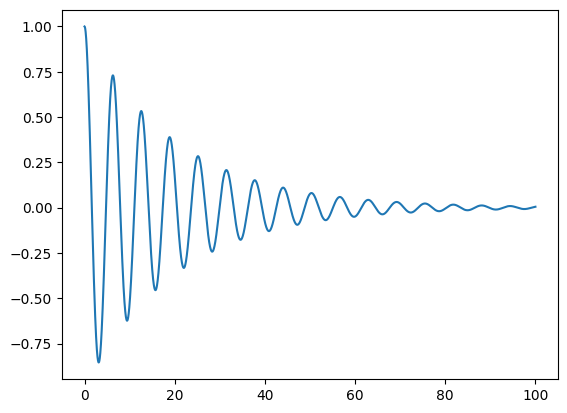

In [23]:
equation = lambda t,x : np.array([x[1], -x[1]*c/m - x[0]*k/m])
m, c, k = 1, 0.1, 1
x0 = np.array([1, 0])
dt = 0.01
T = 100
estimate = runge_kutta_4(equation, x0, dt, T)
t = np.arange(0, T, dt)
plt.plot(t, estimate[:,0])
plt.show()